<a href="https://colab.research.google.com/github/GauravKakoti/Data-Science/blob/main/ChronicKidneyDiseasesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#describtion: This program classoifies patients as having chronic kidney diseases(ckd) or not
#using artificial neural networks(ANN)

In [3]:
#import the libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [4]:
#Load the data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('kidney_disease.csv')

#print the first 5 rows
df.head(5)

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
#Get the shape of the data (the number of rows & cols)
df.shape

(400, 26)

In [29]:
#Create a list of columns names to keep
columns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

#Drop the columns that are not in the columns_to_retain
df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1 )

#Drop the rows with na or missing values
df = df.dropna(axis=0)


In [30]:
#Transfrom the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] )  

In [31]:
#Print the first 5 rows of the new cleaned data set
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,11,42,14,1,0,0,1,1,1,0
9,1,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,107.0,7.2,114.0,3.7,9.5,8,11,12,1,1,0,1,0,1,0
11,2,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,60.0,2.7,131.0,4.2,10.8,11,25,13,1,1,0,1,1,0,0
14,3,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,90.0,4.1,130.0,6.4,5.6,0,8,2,1,1,1,1,1,0,0
20,4,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,148.0,3.9,135.0,5.2,7.7,4,63,7,1,1,1,1,1,1,0


In [32]:
#Split the data into independent (X) dataset (The features) and dependent (Y) data set (the target)
X = df.drop(['classification'], axis=1)
Y = df['classification']

In [33]:
#Feature Scaling
#min-max scaler method scales the data set so that all the input features lie between 0 and 1
X_scaler = MinMaxScaler()
X_scaler.fit(X)
column_names = X.columns
X[column_names] = X_scaler.transform(X)

In [34]:
#Split the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True)

In [35]:
#Build the model
model = Sequential()
model.add( Dense(256, input_dim= len(X.columns) , kernel_initializer = k.initializers.random_normal(seed=13), activation='relu') )
model.add( Dense(1, activation= 'hard_sigmoid') )

In [36]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [37]:
#Train the model
history = model.fit(X_train, Y_train, epochs = 2000, batch_size= X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5714
Epoch 2/2000
1/1 [==============================] - 0s 954us/step - loss: 0.6562 - accuracy: 0.9206
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.9286
Epoch 4/2000
1/1 [==============================] - 0s 926us/step - loss: 0.5971 - accuracy: 0.9286
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5692 - accuracy: 0.9286
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.9206
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.9365
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.9365
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.9365
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.9365
Epoch 11/2000
1

In [39]:
#Save the model
model.save('ck.model')

INFO:tensorflow:Assets written to: ck.model/assets


Text(0.5, 0, 'epoch')

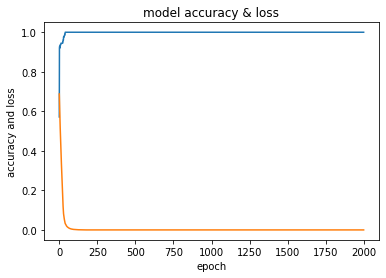

In [41]:
#Visulaize the models loss and acuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [42]:
#get the shape of the training and testing data set
print('shape of the training date:', X_train.shape)
print('shape of test date:', X_test.shape)

shape of the training date: (126, 25)
shape of test date: (32, 25)


In [47]:
#Show the actual and predicted values
pred = model.predict(X_test)
pred = [1 if Y>=0.5 else 0 for Y in pred]
pred

print('Original : {0}'.format(",".join(str(X) for X in Y_test)))
print('Predicted : {0}'.format(",".join(str(X) for X in pred)))

Original : 1,1,0,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1
Predicted : 1,1,0,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1
